<a href="https://colab.research.google.com/github/NischalRathour/Concept-and-technology-of-AI/blob/main/Worksheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

• To - Do - 1:
1. Read and Observe the Dataset.
2. Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
3. Print the Information of Datasets. {Hint: pd.info}.
4. Gather the Descriptive info about the Dataset. {Hint: pd.describe}
5. Split your data into Feature (X) and Label (Y).

In [13]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/concept and technology of AI/Datasets/student.csv')

print("Top 5 rows of the dataset:")
print(data.head())

print("\nBottom 5 rows of the dataset:")
print(data.tail())

print("\nDataset Information:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe())

X = data[['Math', 'Reading']].values
Y = data['Writing'].values

print("\nFeature Matrix (X):")
print(X[:5])

print("\nTarget Vector (Y):")
print(Y[:5])


Top 5 rows of the dataset:
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

Bottom 5 rows of the dataset:
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None

Descriptive Statistics:
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.00000

• To - Do - 2:
1. To make the task easier - let’s assume there is no bias or intercept.
2. Create the following matrices:
Y = WTXW =





w1
w2
.
.
.
wd





, where W ∈ R
d
X =





x1,1 x1,2 · · · x1,n
x2,1 x2,2 · · · x2,n
.
.
.
.
.
.
.
.
.
.
.
.
xd,1 xd,2 · · · xd,n





, where X ∈ R
d×n
Y =





y1
y2
.
.
.
yn





, where Y ∈ R
n
3. Note: The feature matrix described above does not include a column of 1s, as it assumes the
absence of a bias term in the model.


In [14]:
import numpy as np

X_transposed = X.T
d = X.shape[1]
W = np.zeros((d, 1))
Y_reshaped = Y.reshape(-1, 1)

print(f"X (Feature Matrix): {X.shape} -> Transposed: {X_transposed.shape}")
print(f"W (Weight Matrix): {W.shape}")
print(f"Y (Target Vector): {Y_reshaped.shape}")

Y_pred = np.dot(X, W)
print(f"Predicted Y (initial, all zeros): \n{Y_pred[:5]}")


X (Feature Matrix): (1000, 2) -> Transposed: (2, 1000)
W (Weight Matrix): (2, 1)
Y (Target Vector): (1000, 1)
Predicted Y (initial, all zeros): 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


• To - Do - 3:
1. Split the dataset into training and test sets.
2. You can use an 80-20 or 70-30 split, with 80% (or 70%) of the data used for training and the rest
for testing.


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training Set (X_train): {X_train.shape}")
print(f"Training Set (Y_train): {Y_train.shape}")
print(f"Test Set (X_test): {X_test.shape}")
print(f"Test Set (Y_test): {Y_test.shape}")


Training Set (X_train): (800, 2)
Training Set (Y_train): (800,)
Test Set (X_test): (200, 2)
Test Set (Y_test): (200,)


3.1.5 Step -5- Main Function to Integrate All Steps:
In this section, we will create a main function that integrates the data loading, preprocessing, cost function,
gradient descent, and model evaluation. This will help in running the entire workflow with minimal effort.
• Objective:
The objective of the main function is to execute the full process, from loading the data to performing
linear regression using gradient descent and evaluating the results using metrics like RMSE and R2
.
• To - Do:
We will define a function that:
1. Loads the data and splits it into training and test sets.
2. Prepares the feature matrix (X) and target vector (Y).
3. Defines the weight matrix (W) and initializes the learning rate and number of iterations.
4. Calls the gradient descent function to learn the parameters.
5. Evaluates the model using RMSE and R2
.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-5a52921b9656>:9: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
<ipython-input-17-5a52921b9656>:20: RuntimeWarning: invalid value encountered in subtract
  W -= alpha * gradient


Final Weights: [nan nan nan]
Cost History (First 10 iterations): [23207584.144711904, 219421352893.3128, 2074569920226421.8, 1.9614501038174667e+19, 1.8544983575900264e+23, 1.7533783559472862e+27, 1.6577721120764925e+31, 1.5673789779923484e+35, 1.4819146991049035e+39, 1.4011105203389428e+43]
RMSE on Test Set: nan
R-Squared on Test Set: nan


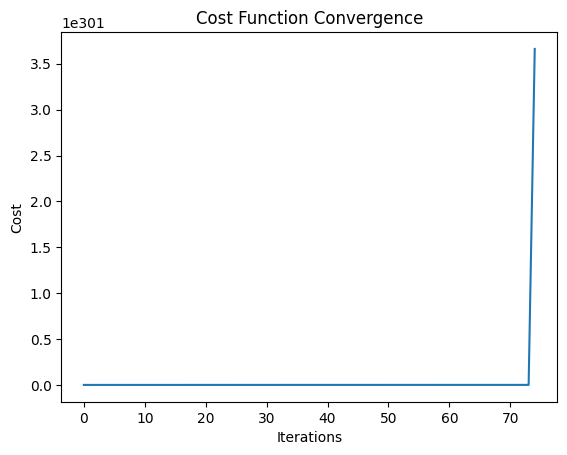

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
    return cost

def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []

    for _ in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        gradient = (1 / m) * np.dot(X.T, loss)
        W -= alpha * gradient
        cost = cost_function(X, Y, W)
        cost_history.append(cost)

    return W, cost_history

def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

def main():
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/concept and technology of AI/Datasets/student.csv')
    X = data[['Math', 'Reading']].values
    Y = data['Writing'].values.reshape(-1, 1)
    X = np.c_[np.ones((X.shape[0], 1)), X]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    W = np.zeros((X_train.shape[1], 1))
    alpha = 0.01
    iterations = 1000
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)
    Y_pred = np.dot(X_test, W_optimal)
    model_rmse = rmse(Y_test, Y_pred)
    model_r2 = r2(Y_test, Y_pred)
    print("Final Weights:", W_optimal.flatten())
    print("Cost History (First 10 iterations):", cost_history[:10])
    print("RMSE on Test Set:", model_rmse)
    print("R-Squared on Test Set:", model_r2)
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Function Convergence")
    plt.show()

if __name__ == "__main__":
    main()
